In [48]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.special import erf

import os
import re
import json

### Functions

In [62]:
def list_json_files(dir_):
    list_json_filenames=[]
    filenames=os.listdir(dir_)
    filenames.sort()
    for filename in filenames:
        if re.match('.*\.json', filename):
            list_json_filenames.append(dir_+'/'+filename)
    return list_json_filenames

def load_json(filename):
    with open(filename, 'r') as f:
        return json.loads(f.read())

In [73]:
    
def plot_stim(stim_struct, Q_10_func=None):
    '''
    Args:
        stim_struct: stim struct loaded from json file
        Q_10_func: function f -> Q_10'''
    eps=1e-6
    pl.figure()
    pl.title(stim_struct['name'])
    freq=np.linspace(100,13000, 1000)
    res=np.zeros(len(freq))
    if stim_struct['n_bands']>1:
        bands_list= stim_struct['bands']
    else:
        bands_list= [stim_struct['bands']]
    for band in bands_list:
        res+=band['amplitude']*(freq>=(band['fc_low']))*(freq<=(band['fc_high']))
    pl.plot(freq/1000, 20*np.log10(res+eps))
    
    
    if Q_10_func is not None:
        res_sq=np.zeros(len(freq))
        Df_10dB=freq/Q_10_func(freq)
        sig_f=1/(2*2.14)*Df_10dB
        for band in bands_list:
            inc_sq=0.5*(erf((band['fc_high']-freq)/(np.sqrt(2)*sig_f))-erf((band['fc_low']-freq)/(np.sqrt(2)*sig_f)))
            res_sq+=band['amplitude']**2*inc_sq
        pl.plot(freq/1000, 10*np.log10(res_sq+eps))
            
            
    pl.xlabel('f (kHz)')
    pl.ylabel('Amplitude (dB)')
    pl.ylim([-60, -10])
    pl.show()
    
def Q_10_power_law(alpha=0.6):
    return lambda f : 2*(f/1e3)**alpha

### Exemple

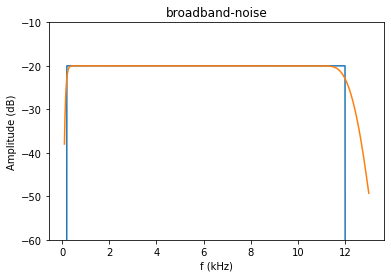

In [74]:
filename='broadband-noise.json'
stim_struct=load_json(filename)
Q_10_func=Q_10_power_law(alpha=0.6)
plot_stim(stim_struct, Q_10_func=Q_10_func)

#### Notch 5k

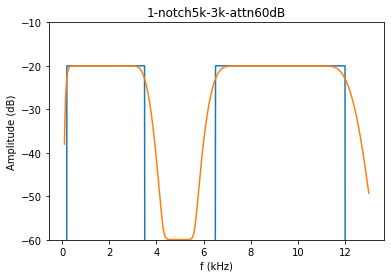

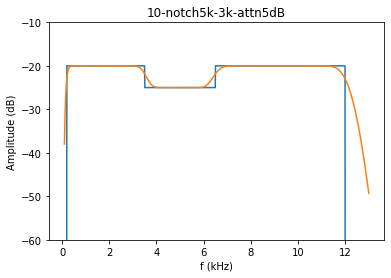

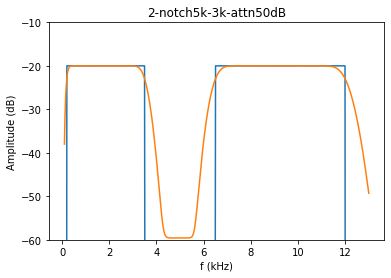

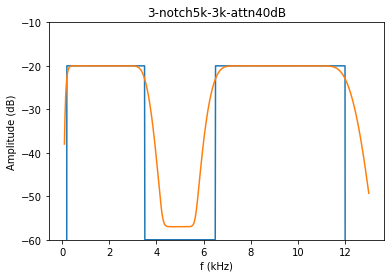

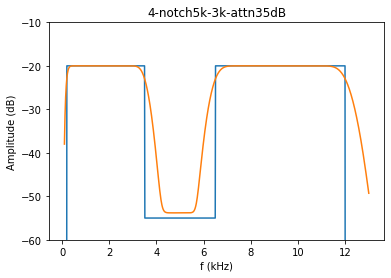

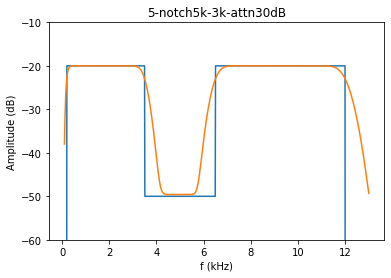

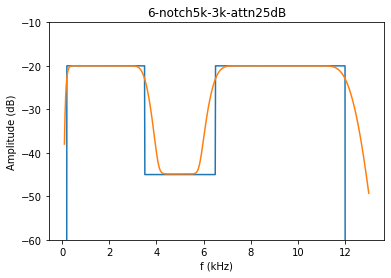

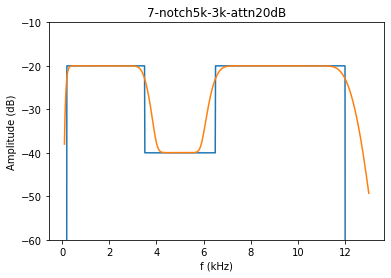

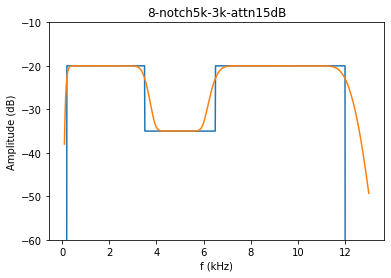

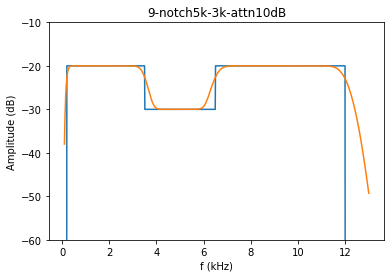

In [75]:
Q_10_func=Q_10_power_law(alpha=0.6)
for filename in list_json_files('stimFiles/1-notch5k-3k-levels/'):
    stim_struct=load_json(filename)
    plot_stim(stim_struct, Q_10_func=Q_10_func)

### Narrow band

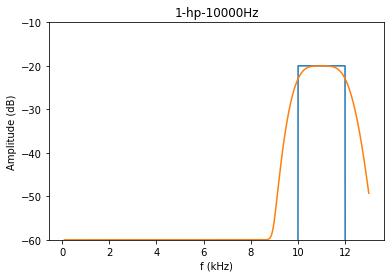

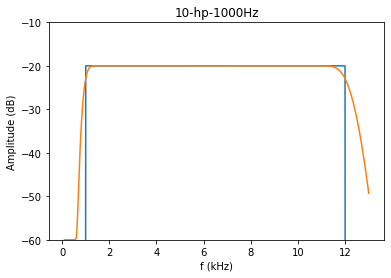

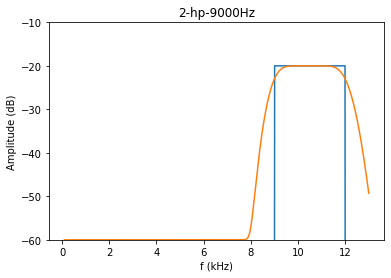

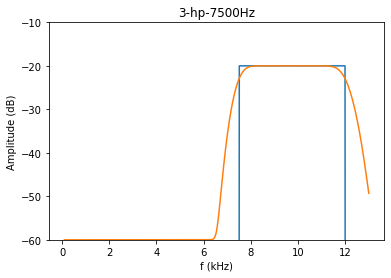

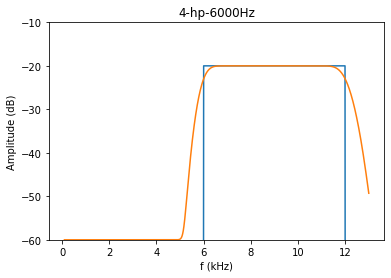

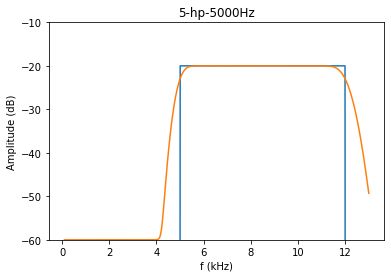

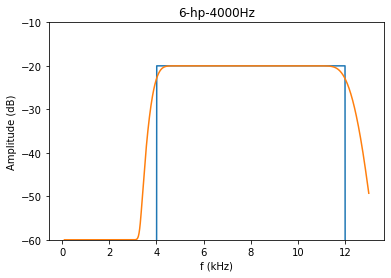

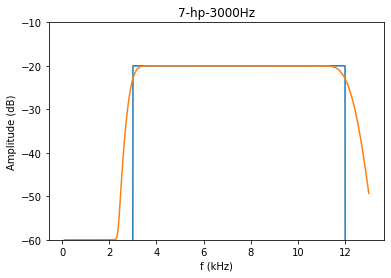

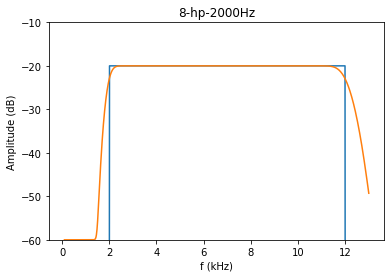

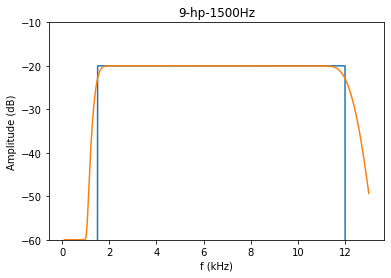

In [76]:
Q_10_func=Q_10_power_law(alpha=0.6)
for filename in list_json_files('stimFiles/4-narrowbandanalysis//'):
    stim_struct=load_json(filename)
    plot_stim(stim_struct, Q_10_func=Q_10_func)

### Hp around fc

### Narrow 5k

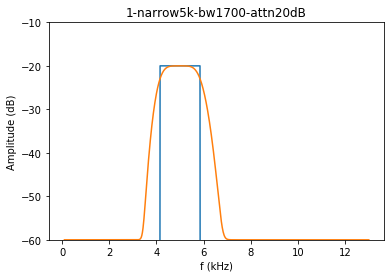

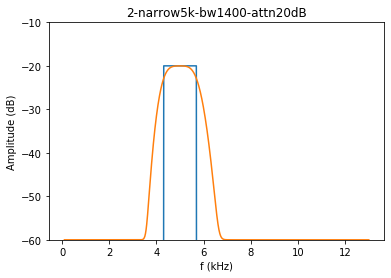

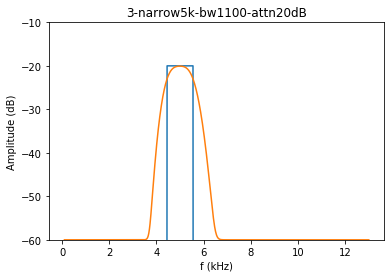

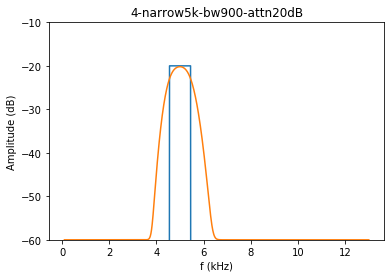

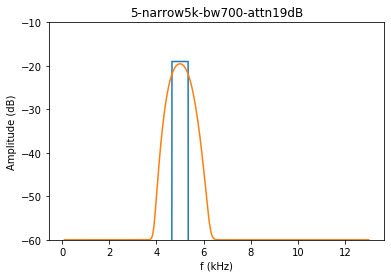

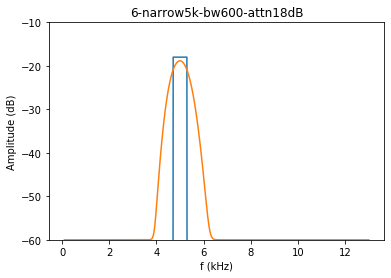

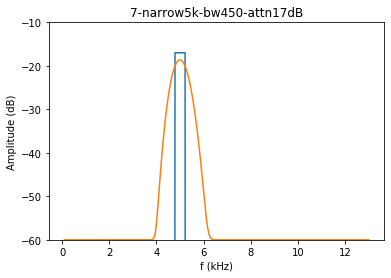

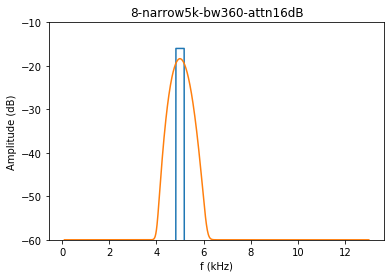

In [78]:
Q_10_func=Q_10_power_law(alpha=0.6)
for filename in list_json_files('stimFiles/7-narrow5k/'):
    stim_struct=load_json(filename)
    plot_stim(stim_struct, Q_10_func=Q_10_func)

### Notches

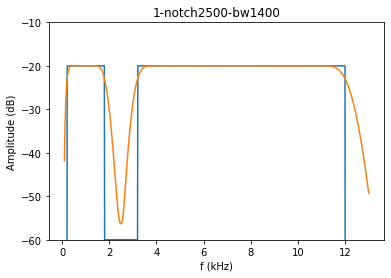

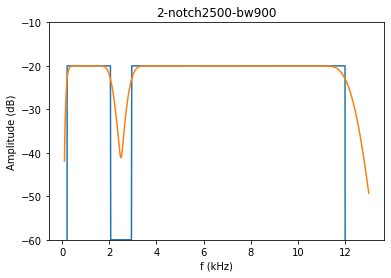

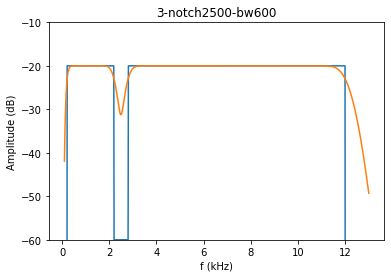

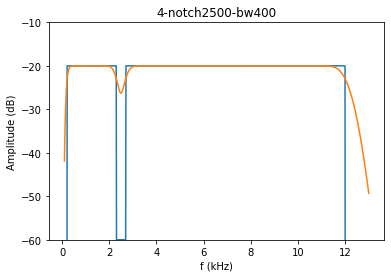

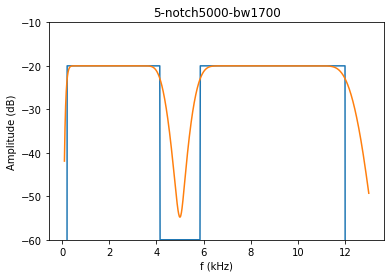

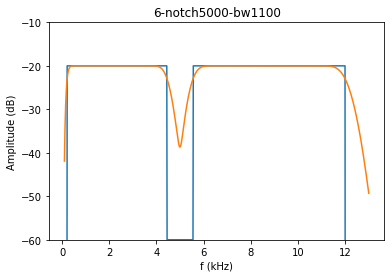

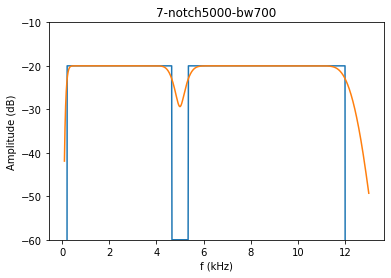

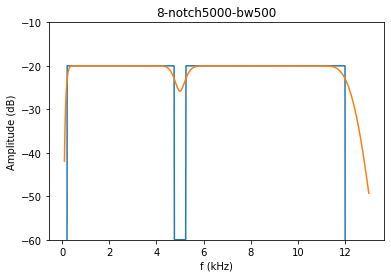

In [79]:
Q_10_func=Q_10_power_law(alpha=0.6)
for filename in list_json_files('stimFiles/9-notch-around-2500-5000/'):
    stim_struct=load_json(filename)
    plot_stim(stim_struct, Q_10_func=Q_10_func)

### Various maskers

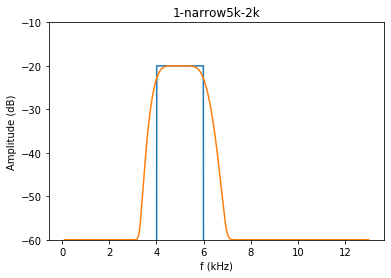

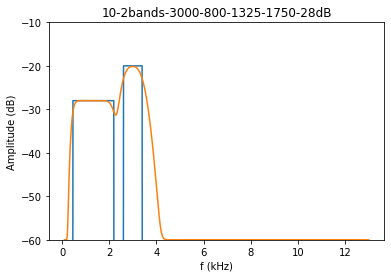

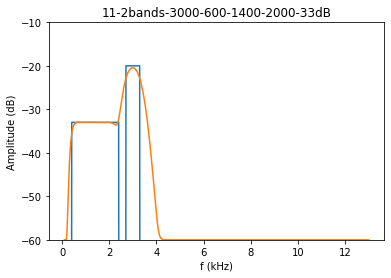

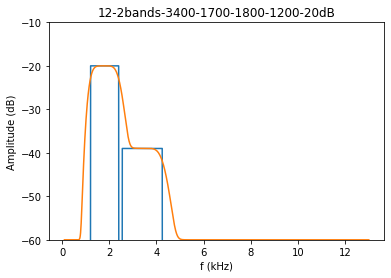

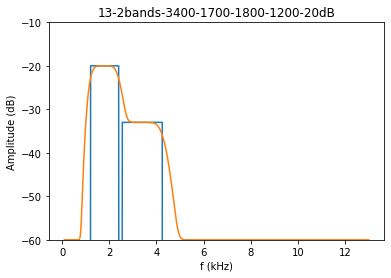

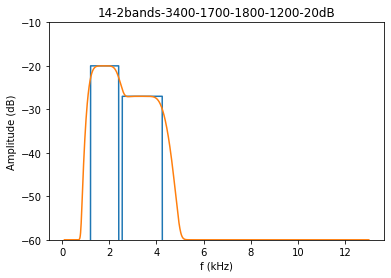

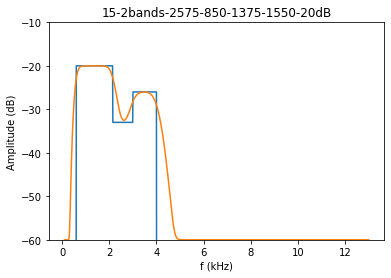

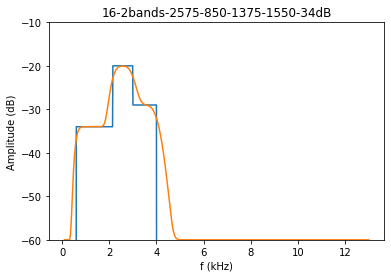

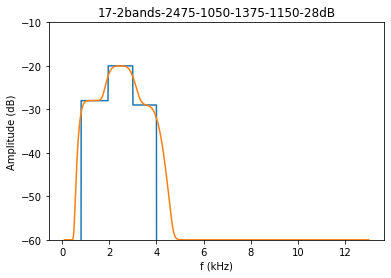

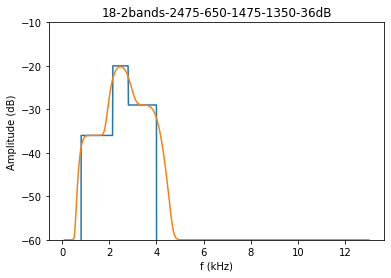

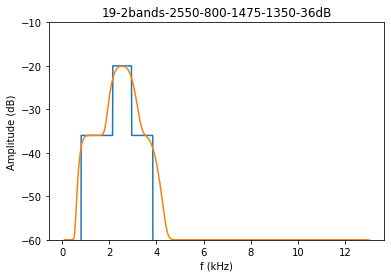

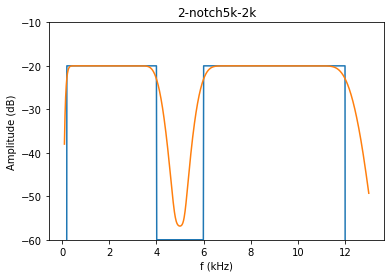

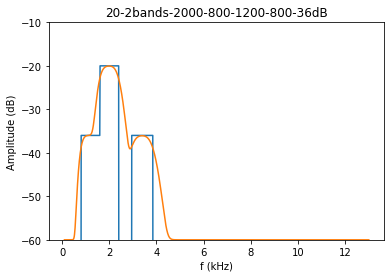

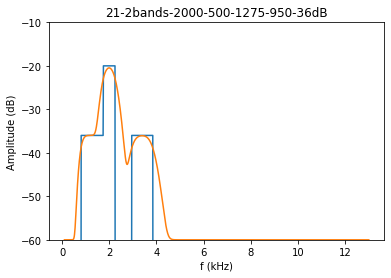

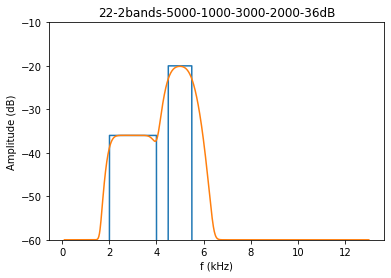

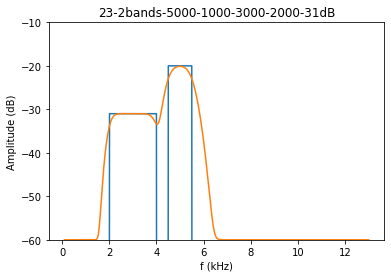

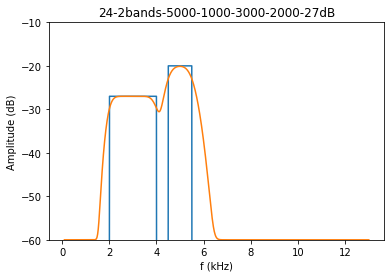

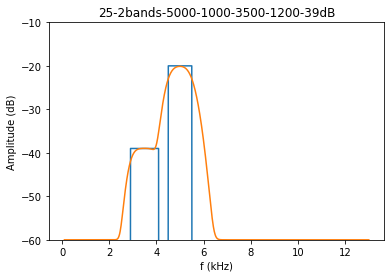

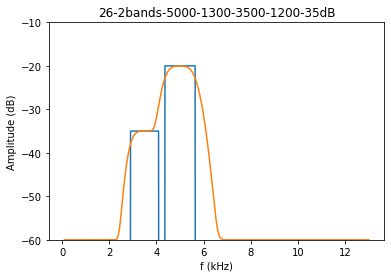

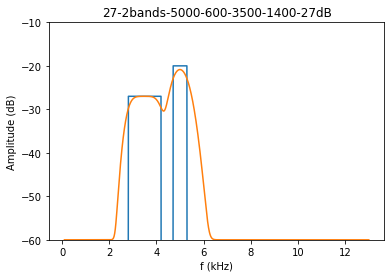

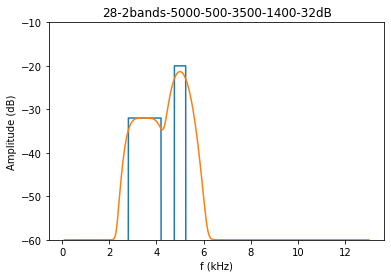

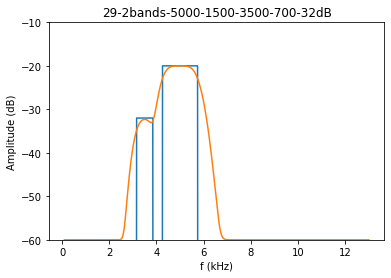

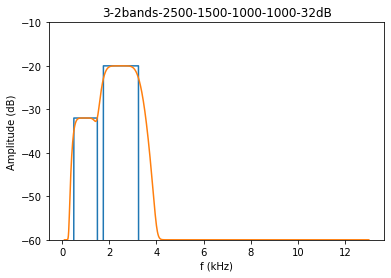

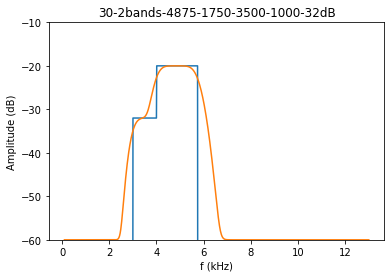

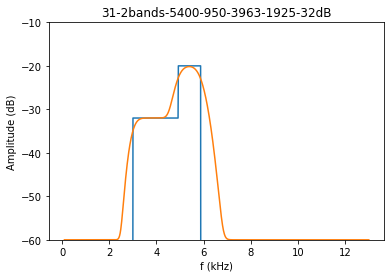

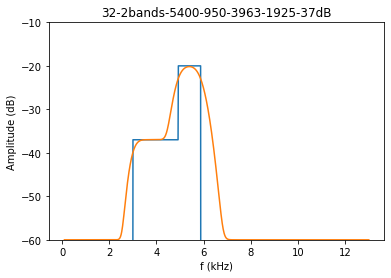

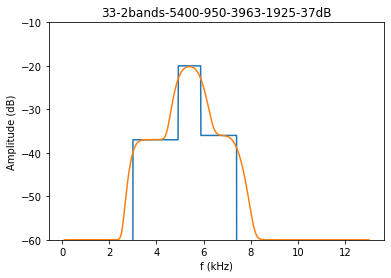

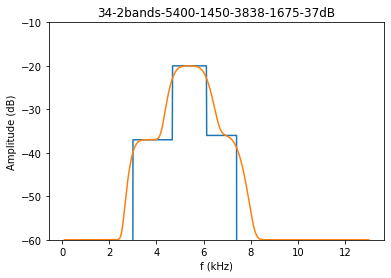

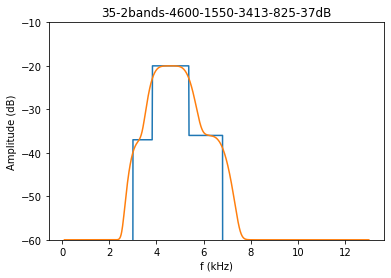

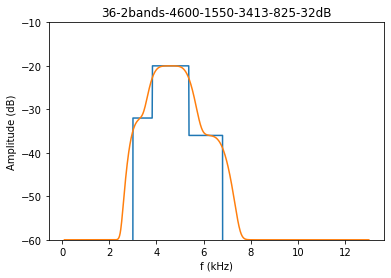

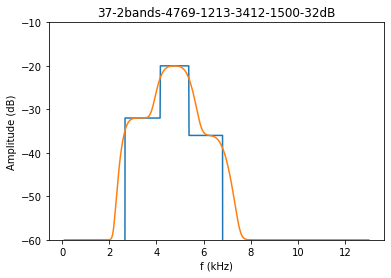

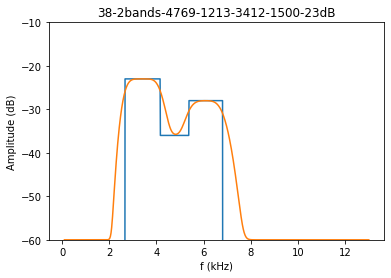

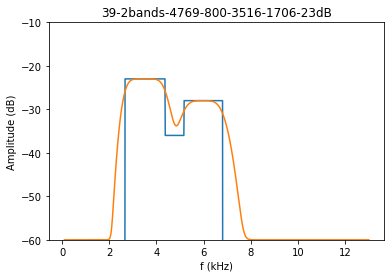

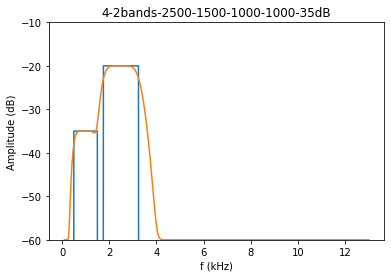

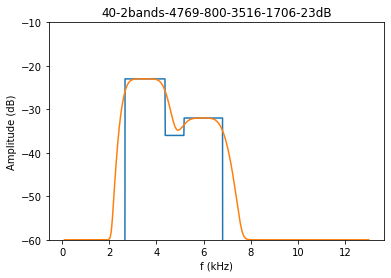

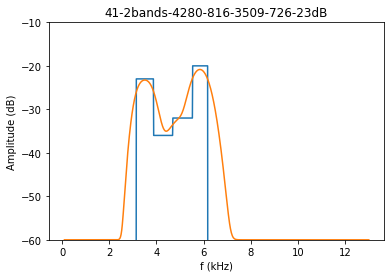

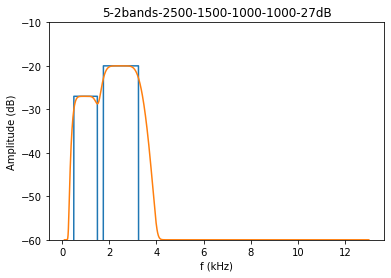

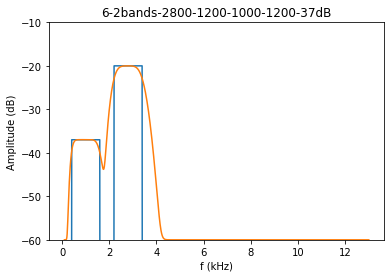

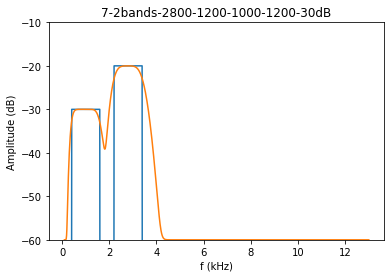

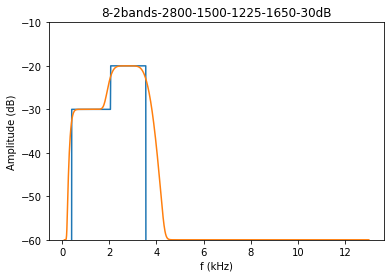

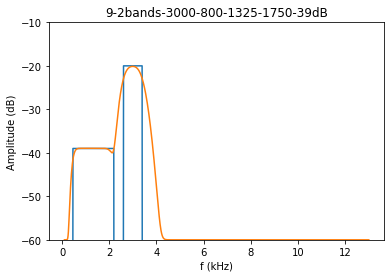

In [80]:
Q_10_func=Q_10_power_law(alpha=0.6)
for filename in list_json_files('stimFiles/10-various-maskers/'):
    stim_struct=load_json(filename)
    plot_stim(stim_struct, Q_10_func=Q_10_func)